<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [23]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib nbagg
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave

# remove the mean!!
x=x-np.mean(x)

noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.

#Save the data before noise is added for comparing against filtered data
dataBeforeNoise = xn-noise
dataBeforeNoise = dataBeforeNoise-np.mean(dataBeforeNoise)

# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

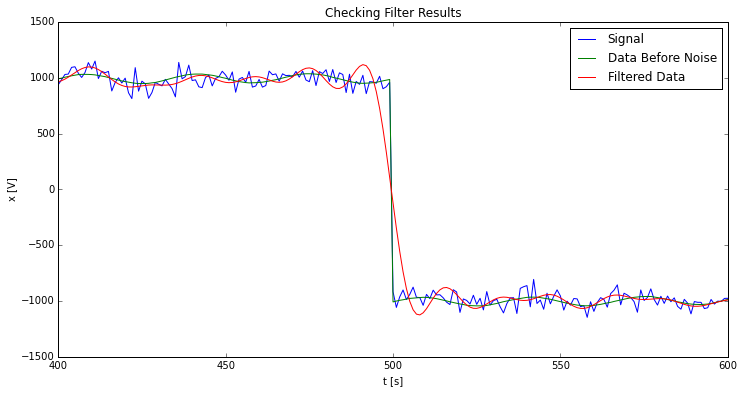

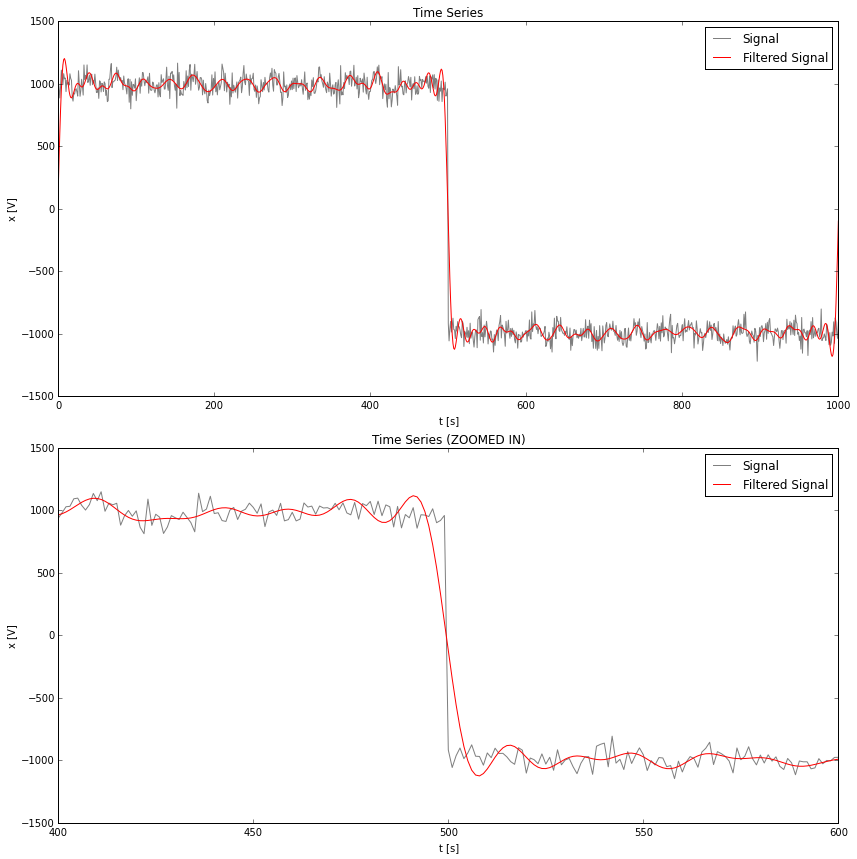

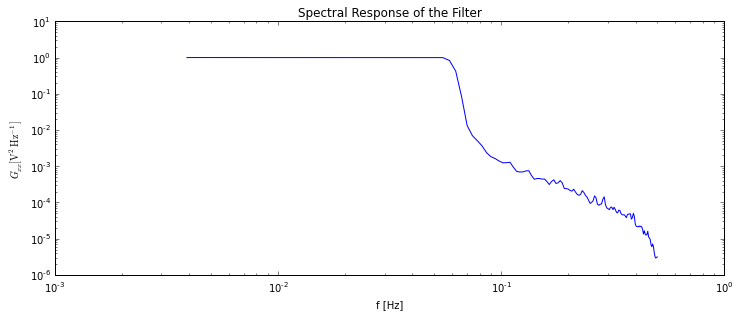

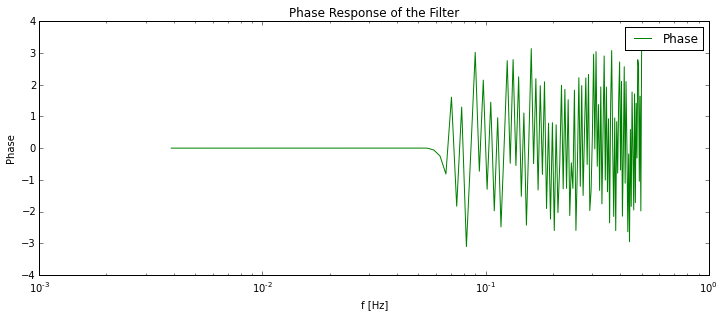

In [34]:
#Implement the filter
def filterData(data, cutoffFrequency):
    #Fourier transform from time to frequency domain
    X = np.fft.fft(data)
    N = np.shape(data)[0]
    frequencies = np.linspace(0,1./dt,N)
    
    #Apply the filter in the frequency domain
    X[ (frequencies>cutoffFrequency) & (frequencies<(1./dt-cutoffFrequency)) ] = 1.e-15
    
    #Inverse fourier transform back to the time domain
    filteredData = np.real(np.fft.ifft(X)) + np.mean(data)
    
    return filteredData

#Check how good the filter is
def checkFilter(data,dataBeforeNoise,filteredData,time):
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,1)
    
    ax=plt.subplot(gs[0:1])
    ax.plot(time,data,label='Signal')
    ax.plot(time,dataBeforeNoise,label='Data Before Noise')
    ax.plot(time,filteredData,label='Filtered Data')
    ax.set_xlabel('t [s]')
    ax.set_ylabel('x [V]')
    ax.set_title('Checking Filter Results')
    ax.set_xlim(left=400,right=600)
    ax.legend()

#Plot the signal and the smoothed signal
def plotSignal(signal,smoothedSignal,time,k=None):
    #check for k input (x-axis for smoothed signal)
    time2 = time
    if k!=None:
        time2 = k
    
    plt.figure(figsize=(12,12))
    gs=gridspec.GridSpec(2,1)

    ax1=plt.subplot(gs[0:1])
    ax1.plot(time,signal,'k',label='Signal',alpha=0.5)
    ax1.plot(time2,smoothedSignal,color='red',label='Filtered Signal')
    ax1.set_xlabel('t [s]')
    ax1.set_ylabel('x [V]')
    ax1.set_title('Time Series')
    ax1.legend()
    
    ax2=plt.subplot(gs[1:2])
    ax2.plot(time,signal,'k',label='Signal',alpha=0.5)
    ax2.plot(time2,smoothedSignal,color='red',label='Filtered Signal')
    ax2.set_xlabel('t [s]')
    ax2.set_ylabel('x [V]')
    ax2.set_title('Time Series (ZOOMED IN)')
    ax2.set_xlim(left=400,right=600)
    ax2.legend()
    
    plt.tight_layout()
    
    return ax1,ax2

#Plot the spectral response
def plotSpectra(power,smoothedPower,freq):
    #compute the spectral response
    H = np.abs(np.sqrt(smoothedPower/power))
    
    #Plot the spectral response
    plt.figure(figsize=(12,10))
    gs=gridspec.GridSpec(2,1)

    ax=plt.subplot(gs[0:1])
    #ax.plot(freq,power,'k',label='Spectral Response',alpha=0.5)
    #ax.plot(freq,smoothedPower,color='red',label='Filtered Spectral Response')
    ax.plot(freq,H)
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel(r'$G_{xx} \mathrm{[V^2 Hz^{-1}]}$')
    ax.set_title('Spectral Response of the Filter')
    ax.loglog()
    ax.legend()
    
    return ax

#Plot the phase response angle
def plotPhase(crossPower,freq):
    #Compute the phase
    angle = np.angle(crossPower)
    #angle = np.angle(power)
    #smoothedAngle = np.angle(smoothedPower)
    
    #Plot the phase
    plt.figure(figsize=(12,10))
    gs=gridspec.GridSpec(2,1)
    
    ax=plt.subplot(gs[0:1])
    ax.plot(freq,angle,color='green',label='Phase')
    #ax.plot(freq,smoothedAngle/np.pi,color='red',label='Filtered Phase')
    ax.set_xlabel('f [Hz]')
    #ax.set_ylabel('$Phase / \pi$')
    ax.set_ylabel('Phase')
    ax.set_title('Phase Response of the Filter')
    ax.legend()
    ax.semilogx()
    
    return ax

#Run the functions
nfft = 2**8 #256
args = {'NFFT':nfft,'Fs':1./dt,'noverlap':nfft/2.,'window':mlab.window_hanning}
frequencyCutoff = 0.06
xn_filtered = filterData(xn,frequencyCutoff)
checkFilter(xn,dataBeforeNoise,xn_filtered,t)
plotSignal(xn,xn_filtered,t)
powerSignal,freq = mlab.psd(xn,**args)
powerSignalFiltered,freq = mlab.psd(xn_filtered,**args)
plotSpectra(powerSignal,powerSignalFiltered,freq)
crossPower,freq = mlab.csd(xn,xn_filtered,**args)
plotPhase(crossPower,freq)

COMMENT HERE:

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

In [25]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

COMMENT HERE

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

In [26]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

COMMENT HERE

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

In [35]:
# Create red noise
def createRed(N):
    t = np.arange(N*1.)
    x = np.cumsum(np.random.randn(N))
    x=x-np.mean(x)
    return x,t

# Apply the truncated Dirichlet Kernel bandpass filter
def bandpass(data,time,frequencyCutoff,N):
    #N = len(data)
    k = np.array(range(-N/2+1,N/2))
    M = frequencyCutoff*2*N+1
    filteredData = (1./N)*np.sin(np.pi*(k+0.000001)*M/N)/np.sin(np.pi*(k+0.000001)/N)
    return filteredData,k

# Check how good the filter is


# Plot the data


# Plot the spectra


# Plot the response function H^2


# Plot the phase



C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:35: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


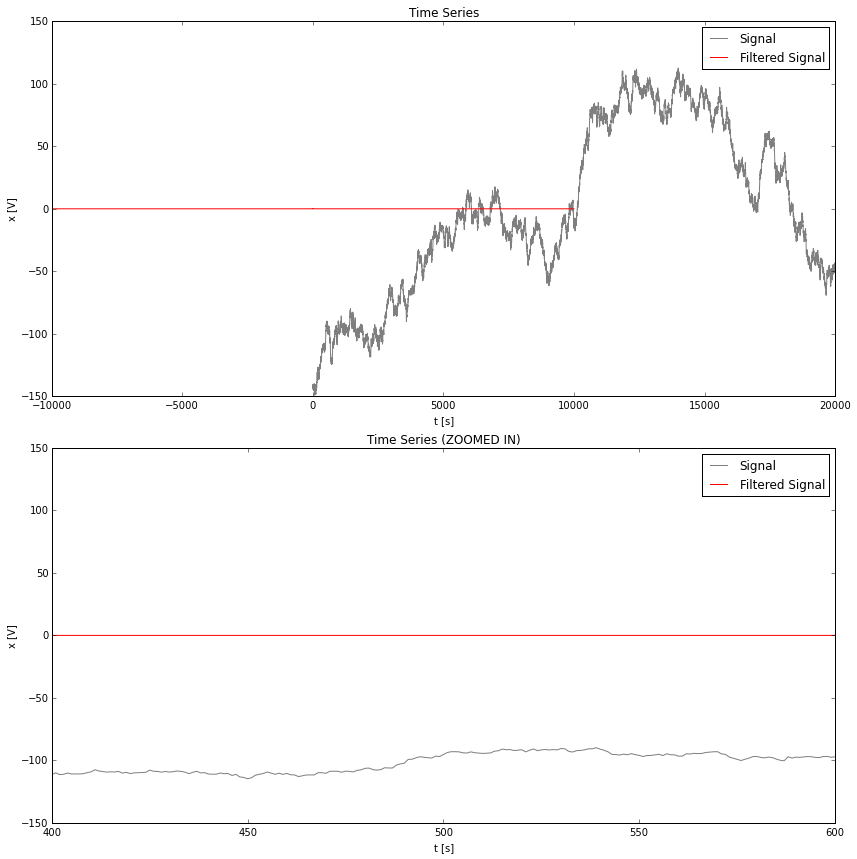

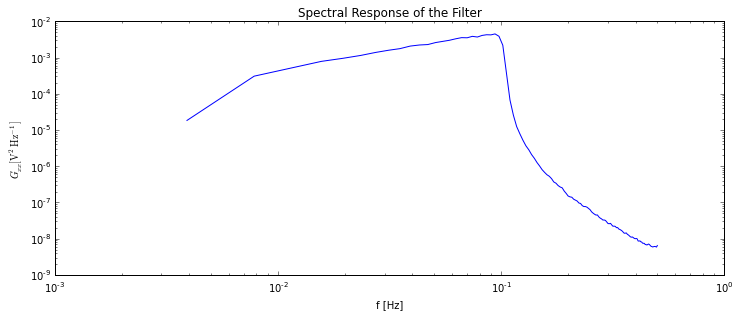

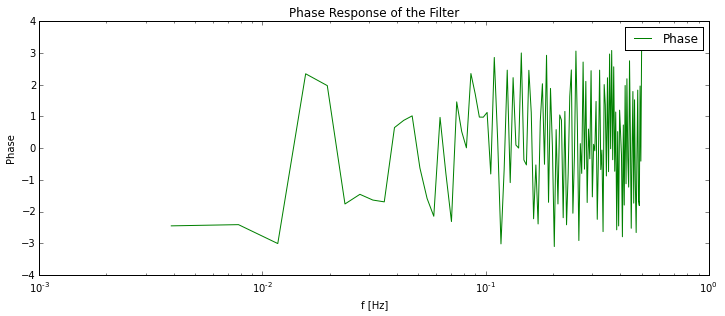

In [36]:
# Run the functions
N = 20000
red,time = createRed(N)
frequencyCutoff = 0.1
red_filtered,k = bandpass(red,time,frequencyCutoff,N)
plotSignal(red,red_filtered,time,k)
powerRed,freq = mlab.psd(red,**args)
powerRedFiltered,freq = mlab.psd(red_filtered,**args)
plotSpectra(powerRed,powerRedFiltered,freq)
crossPowerRed,freq = mlab.csd(red,red_filtered,**args)
plotPhase(crossPowerRed,freq)

COMMENT

## Q3: Bandpass the weather data

In [ ]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

COMMENT HERE